In [286]:
%%html
<style>
table {float:left}
</style>

<center><img src="https://cdn3.iconfinder.com/data/icons/ballicons-reloaded-free/512/icon-82-512.png" width=300></center>

<center><h1>Final Project</h1></center>

The aim of this project is to illustrate the phrase:

>_Having an ace up your sleeve_

And evaluate its viability

## Importing required libraries

- We will be needing `itertools` for the modified code of Diego Salinas
- We will be needing `random` for choosing cards in the deck
- `pyplot` for beautiful plots
- And finally `time` to measure performance

In [287]:
import itertools
import random
import matplotlib.pyplot as plt
from time import time

## Setting up the parameters

Here are some things that we need to set before starting any of the code <br>
-> the number of players, common cards and unique cards for each player

In [347]:
NB_PLAYERS = 5
NB_COMMON_CARDS = 3
NB_CARDS = 2

## Creating the deck of 52 cards

Creates a list of four suits each containing 13 cards

Cards will be represented as `H3` where `H` represents the suit (in this case hearts) and `3` represents the value

| 2-10 | 11 | 12 | 13 | 14 
|:-:|:-:|:-:|:-:|:-:
| 2-10 | Jack | Queen | King | Ace 

In [289]:
def create_deck():   
    deck = []
    for i in range(2,15):
        for s in ['H','S','C','D']:
            card = s + str(i)
            deck.append(card)
    return deck

### Test

In [290]:
assert create_deck() == [
    'H2', 'S2', 'C2', 'D2',
    'H3', 'S3', 'C3', 'D3',
    'H4', 'S4', 'C4', 'D4',
    'H5', 'S5', 'C5', 'D5',
    'H6', 'S6', 'C6', 'D6',
    'H7', 'S7', 'C7', 'D7',
    'H8', 'S8', 'C8', 'D8',
    'H9', 'S9', 'C9', 'D9',
    'H10', 'S10', 'C10', 'D10',
    'H11', 'S11', 'C11', 'D11',
    'H12', 'S12', 'C12', 'D12',
    'H13', 'S13', 'C13', 'D13',
    'H14', 'S14', 'C14', 'D14']

## Initializing common cards

Takes cards from the deck to form a list of [common cards](#definition)

In [291]:
def initialize_common_cards(deck):
    common_cards = []
    
    for _ in range(NB_COMMON_CARDS):
        rnd = random.randint(0, len(deck) - 1)
        common_cards.append(deck[rnd])
        deck.pop(rnd)

    return common_cards

### Example

In [338]:
initialize_common_cards(create_deck())

['C11', 'D7', 'S13']

## Giving out the cards to each player

Gives out two cards to each player then adds the common cards to their game

In [293]:
def give_out_hands(deck):
    player_hands = []
    for i in range (NB_PLAYERS):
        player_hands.append([])

    common_cards = initialize_common_cards(deck)

    #gives out the cards to the players
    for i in range(0, NB_PLAYERS):
        for j in range(0, NB_CARDS):
            rnd = random.randint(0, len(deck) - 1)
            player_hands[i].append(deck[rnd])
            deck.pop(rnd)
        
        # adds the common cards
        player_hands[i].extend(common_cards)

    return player_hands

### Test

In [339]:
give_out_hands(create_deck())

[['S13', 'H5', 'H11', 'S2', 'S3'],
 ['D5', 'C5', 'H11', 'S2', 'S3'],
 ['H13', 'D4', 'H11', 'S2', 'S3'],
 ['H4', 'C6', 'H11', 'S2', 'S3'],
 ['D14', 'S5', 'H11', 'S2', 'S3'],
 ['D13', 'H8', 'H11', 'S2', 'S3'],
 ['H3', 'D3', 'H11', 'S2', 'S3'],
 ['C2', 'C9', 'H11', 'S2', 'S3'],
 ['H10', 'S14', 'H11', 'S2', 'S3'],
 ['C8', 'H6', 'H11', 'S2', 'S3']]

## Counting score

This part is very important for figuring out a winner <br>
Unfortunately, it is not the main aim of our project and the code already exist <br>
This is why we will be using parts of <b>Diego Salinas' code </b> available [here](https://towardsdatascience.com/poker-with-python-how-to-score-all-hands-in-texas-holdem-6fd750ef73d)<br>

In [311]:
def combinations(arr, n):
    arr = np.asarray(arr)
    t = np.dtype([('', arr.dtype)]*n)
    result = np.fromiter(itertools.combinations(arr, n), t)
    return result.view(arr.dtype).reshape(-1, n)

def check_four_of_a_kind(hand,letters,numbers,rnum,rlet):
    for i in numbers:
            if numbers.count(i) == 4:
                four = i
            elif numbers.count(i) == 1:
                card = i
    score = 105 + four + card/100
    return score

def check_full_house(hand,letters,numbers,rnum,rlet):
    for i in numbers:
        if numbers.count(i) == 3:
            full = i
        elif numbers.count(i) == 2:
            p = i
    score = 90 + full + p/100  
    return score

def check_three_of_a_kind(hand,letters,numbers,rnum,rlet):
    cards = []
    for i in numbers:
        if numbers.count(i) == 3:
            three = i
        else: 
            cards.append(i)
    score = 45 + three + max(cards) + min(cards)/1000
    return score

def check_two_pair(hand,letters,numbers,rnum,rlet):
    pairs = []
    cards = []
    for i in numbers:
        if numbers.count(i) == 2:
            pairs.append(i)
        elif numbers.count(i) == 1:
            cards.append(i)
            cards = sorted(cards,reverse=True)
    score = 30 + max(pairs) + min(pairs)/100 + cards[0]/1000
    return score

def check_pair(hand,letters,numbers,rnum,rlet):    
    pair = []
    cards  = []
    for i in numbers:
        if numbers.count(i) == 2:
            pair.append(i)
        elif numbers.count(i) == 1:    
            cards.append(i)
            cards = sorted(cards,reverse=True)
    score = 15 + pair[0] + cards[0]/100 + cards[1]/1000 + cards[2]/10000
    return score

def score_hand(hand):
    letters = [hand[i][:1] for i in range(5)]
    numbers = [int(hand[i][1:]) for i in range(5)] 
    rnum = [numbers.count(i) for i in numbers]  
    rlet = [letters.count(i) for i in letters] 
    dif = max(numbers) - min(numbers) 
    handtype = ''
    score = 0
    if 5 in rlet:
        if numbers ==[14,13,12,11,10]:
            score = 135 
        elif dif == 4 and max(rnum) == 1:
            score = 120 + max(numbers)
        elif 4 in rnum:
            score = check_four_of_a_kind(hand,letters,numbers,rnum,rlet)
        elif sorted(rnum) == [2,2,3,3,3]:
            score = check_full_house(hand,letters,numbers,rnum,rlet)
        elif 3 in rnum:
            score = check_three_of_a_kind(hand,letters,numbers,rnum,rlet) 
        elif rnum.count(2) == 4:
            score = check_two_pair(hand,letters,numbers,rnum,rlet)
        elif rnum.count(2) == 2:
            score = check_pair(hand,letters,numbers,rnum,rlet)
        else:
            score = 75 + max(numbers)/100
    elif 4 in rnum:
        score = check_four_of_a_kind(hand,letters,numbers,rnum,rlet)
    elif sorted(rnum) == [2,2,3,3,3]:
        score = check_full_house(hand,letters,numbers,rnum,rlet)
    elif 3 in rnum:
        score = check_three_of_a_kind(hand,letters,numbers,rnum,rlet)
    elif rnum.count(2) == 4:
        score = check_two_pair(hand,letters,numbers,rnum,rlet)
    elif rnum.count(2) == 2:
        score = check_pair(hand,letters,numbers,rnum,rlet)
    elif dif == 4:
        score = 65 + max(numbers)
    else:
        # handles high card
        suited_numbers = []
        for i in range(len(numbers)):
            if letters[i] == "S":
                suited_numbers.append(numbers[i] + 0.7)
            elif letters[i] == "H":
                suited_numbers.append(numbers[i] + 0.5)
            elif letters[i] == "D":
                suited_numbers.append(numbers[i] + 0.2)
            else: suited_numbers.append(numbers[i])

        n = sorted(suited_numbers, reverse=True)

        score = n[0] + n[1]*1.0e-3 + n[2]*1.0e-6 + n[3]*1.0e-9 + n[4]*1.0e-12
    return score

## Score the hand of a player with $n$ cards

Diego Salinas' code only allows us to score a hand with $5$ cards and we want to score $n$.

We will use a recursive function to score the $n$ combinations of $n-1$ cards until $n=5$.

We will also return the winning hand.

In [312]:
def score_any(player_hand):
    if len(player_hand) == 5:
        return score_hand(player_hand), player_hand

    hand = player_hand[1:]
    max_score, winning_combination = score_any(hand)

    for i in range(len(player_hand) - 1):
        hand.append(player_hand[i])
        hand.pop(0)
        score, best_hand = score_any(hand)
        if score > max_score:
            max_score = score
            winning_combination = best_hand[:]

    return max_score, winning_combination

The main issue with this code is it's runtime, it requires $n!$ steps.

### Test

Explanation

In [340]:
complex_4 = ["C3", "S2", "D2", "S14","H2", "C2", "H12"]
easy_4    = ["S2", "D2", "S14","H2", "C2"]

assert score_any(easy_4) == score_any(complex_4)

## Finding the winning player

Takes a list of player hands in entry and outputs the index of the winner, if their is a draw returns `None`.

In [314]:
def who_won(player_hands):
    winner_id, winner_hand = 0, player_hands[0]
    winner_score, _ = score_any(player_hands[0])
   
    for i in range(1, NB_PLAYERS):
        current_score, _ = score_any(player_hands[i])

        # it's a draw
        if current_score == winner_score:
            return None 

        if current_score > winner_score:
            winner_score, winner_id, winner_hand = current_score, i, player_hands[i]

    return winner_id

### Test

In [341]:
who_won(give_out_hands(create_deck()))

5

## Score the hand of a player cheating and has an ace of spades up his sleeve

We will be adding the `cheating_card` to the hand of the 1st player.

If another player already has that card and `CHEATING_CARD` is used in the 1st player's final combination, the function will raise an `BustedException`.

In [316]:
class BustedException(Exception):
    pass

We are using the Ace of Spades as the cheating card.

In [317]:
cheating_card = "S14"

In [318]:
def cheat_score(player_hands, cheater=0):
    cheater_hand = player_hands[0][:]

    # only adds it if it is not already in his hand
    if cheating_card not in player_hands[cheater] :
        cheater_hand.append(cheating_card)
                
        score, winning_combination = score_any(cheater_hand)
        
        if cheating_card in winning_combination:
            for index, hand in enumerate(player_hands):
                if index != cheater and cheating_card in hand:
                    raise BustedException
    
        return score, winning_combination
    else:
        return score_any(cheater_hand)

In [319]:
def who_won_cheater(player_hands):
    winner_id, winner_hand = 0, player_hands[0]
    winner_score, _ = cheat_score(player_hands)

    for i in range(1, NB_PLAYERS):
        current_score, _ = score_any(player_hands[i])

        # it's a draw
        if current_score == winner_score:
            return None 

        if current_score > winner_score:
            winner_score, winner_id, winner_hand = current_score, i, player_hands[i]

    return winner_id

### Tests

Testing Scoring

In [342]:
hand       = [["S12", "H5", "C4", "H9", "D2"]]
cheat_hand = ["S12", "H5", "C4", "H9", "D2", cheating_card]

assert cheat_score(hand) == score_any(cheat_hand)

Testing when player already has 

In [343]:
hand = [cheating_card, "D2", "C4", "H6", "D2"]
assert cheat_score([hand]) == score_any(hand)

Testing Busted

In [344]:
hands = [['S8', 'S3', 'S6', 'C13', 'S12']] + [['S8', 'S3', 'S6', 'C13', cheating_card] for _ in range(NB_PLAYERS - 1)]
try:
    who_won_cheater(hands)
    assert False
except BustedException:
    pass
except Exception as e:
    raise e

___

# Data Analysis

In [350]:
ITERATIONS = 50_000

## Does every player really win the same amount of time ?

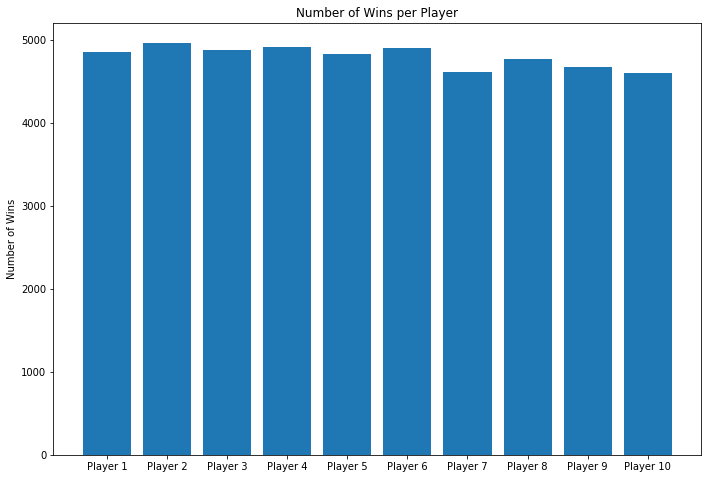

There were 2024 draws, with corresponds to a frequency of 4.0%
Ran in 8.716 seconds


In [345]:
ts = time()

sum_wins = [0 for _ in range(NB_PLAYERS)]
draws = 0

for i in range(0, ITERATIONS):
    deck = create_deck()
    player_hands = give_out_hands(deck)
    winner = who_won(player_hands)
    if winner is not None:
        sum_wins[winner] += 1
    else:
        draws += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
players = [f'Player {i + 1}' for i in range(NB_PLAYERS)]
ax.bar(players, sum_wins)
ax.set_ylabel("Number of Wins")
ax.set_title("Number of Wins per Player")
plt.show()

print(f'There were {draws} draws, with corresponds to a frequency of {round(draws / ITERATIONS, 3)*100}%')
print('Ran in', round(time() - ts, 3), 'seconds')

## Now if Player 1 is cheating ..

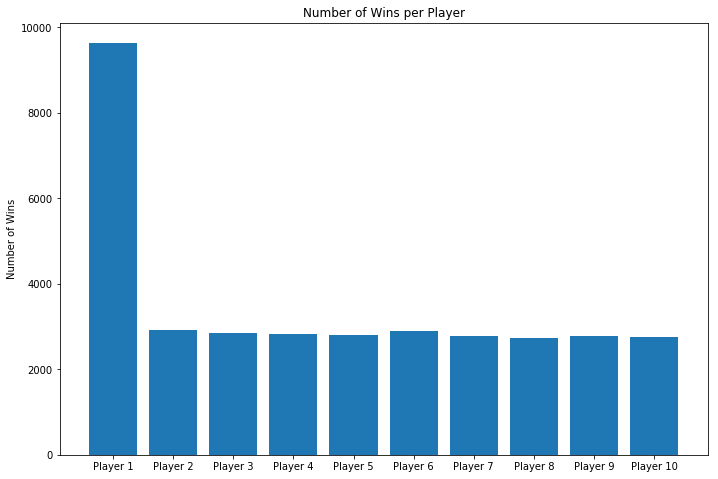

There were 1214 draws, with corresponds to a frequency of 2.4%
Player 1 was busted 13838 times, with corresponds to a frequency of 27.700000000000003%
Ran in 10.061 seconds


In [346]:
ts = time()

sum_wins = [0 for _ in range(NB_PLAYERS)]
draws = 0
busted = 0
cheating_card = "S14"

for i in range(0, ITERATIONS):
    deck = create_deck()
    player_hands = give_out_hands(deck)
    try:
        winner = who_won_cheater(player_hands)
        if winner is not None:
            sum_wins[winner] += 1
        else:
            draws += 1
    except BustedException:
        busted += 1

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
players = [f'Player {i + 1}' for i in range(NB_PLAYERS)]
ax.bar(players, sum_wins)
ax.set_ylabel("Number of Wins")
ax.set_title("Number of Wins per Player")
plt.show()

print(f'There were {draws} draws, with corresponds to a frequency of {round(draws / ITERATIONS, 3)*100}%')
print(f'Player 1 was busted {busted} times, with corresponds to a frequency of {round(busted / ITERATIONS, 3)*100}%')
print('Ran in', round(time() - ts, 3), 'seconds')

## How _should_ we be cheating in poker

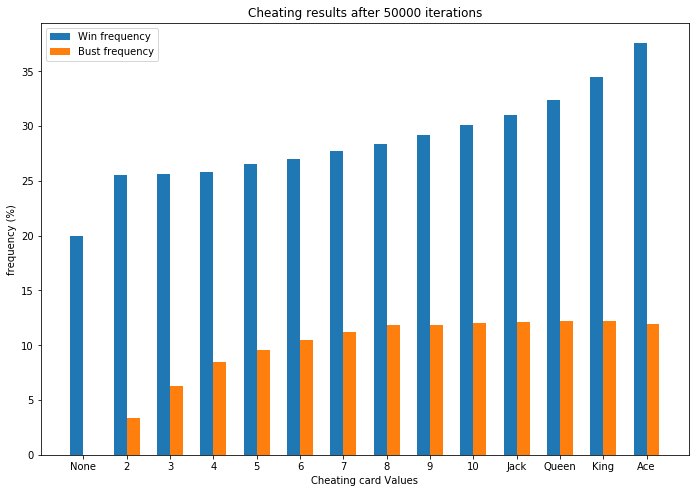

Ran in 100.468 seconds


In [351]:
ts = time()

# We're only going to cheat with spades
list_cheating_cards  = ['None']
for i in range(2,15):
    card = 'S'+ str(i)
    list_cheating_cards.append(card)

expected_freq = 1 / NB_PLAYERS * 100
list_freq_win = [expected_freq]
list_freq_busts = [0]

for i in range (1,len(list_cheating_cards)) :
    cheating_card = list_cheating_cards[i]
    
    sum_cheater_win = 0
    draws = 0
    busted = 0

    for i in range(0, ITERATIONS):
        deck = create_deck()
        player_hands = give_out_hands(deck)
        try:
            winner = who_won_cheater(player_hands)
            if winner is not None and winner == 0:
                sum_cheater_win += 1
        except BustedException:
            busted += 1

    freq_win = sum_cheater_win / ITERATIONS * 100
    expected_freq = 1 / NB_PLAYERS * 100 
    freq_busts = round(busted / ITERATIONS, 3)*100

    
    list_freq_win.append(freq_win)
    list_freq_busts.append(freq_busts)

barWidth = 0.3
bars1 = list_freq_win
bars2 = list_freq_busts
 
r1 = range(len(bars1))
r2 = [x + barWidth for x in r1]

fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])

ax.bar(r1, bars1, width = barWidth, label = 'Win frequency')
ax.bar(r2, bars2, width = barWidth, label = 'Bust frequency')
ax.set_xticks([r + barWidth / 2 for r in range(len(bars1))])

def map_fun(x):
    if x == "None":
        return x
    else:
        value = int(x[1:])
        if value <= 10:
            return value
        elif value == 11:
            return "Jack"
        elif value == 12:
            return "Queen"
        elif value == 13:
            return  "King"
        else:
            return "Ace"

ax.set_xticklabels(map(map_fun, list_cheating_cards))

ax.set_ylabel('frequency (%)')
ax.set_xlabel('Cheating card Values')
ax.set_title(f'Cheating results after {ITERATIONS} iterations')
ax.legend()

plt.show()

print('Ran in', round(time() - ts, 3), 'seconds')

# Conclusion

This project was quite the journey and enlightened me about many of the ins and outs of the game of poker, specifically the Texas Hold'em variant. It is too bad that many decisions and assumptions had to be made in order to advance and reach an answer to our problem.

However, we found many interesting results. So here are some observations that have struck me while trying to solve this problem :

> **The better the card, the better the tradeoff**
>
> It's one of the first things you see on the graph above and yet is something that is not very easily spottable just like that. Of course, if you're just trying to get an edge without taking much risk, cheating with a $2$ is your best option since it gives the best win to not-bust ratio. Interestingly, the bust frequency seems to be concave while the win rate is convex. Given an infinite amount of cards cheating would be easy.

> **It is very unreliable to _'have an ace up your sleeve'_**
>
> The simple truth is that no matter what card you take, you are most likely to be busted in less than 25 games.

> The real takeway ? don't play too long : switch tables every few games